# Exploratory Data Analysis:
## Hotel Booking Data

Data Source: https://www.kaggle.com/mojtaba142/hotel-booking

This dataset contains data from two different hotels in Portugal. It contains 1119390 observations for a 'City Hotel' and a 'Resort Hotel'. From the publication: "Each observation represents a hotel booking between the 1st of July 2015 and 31st of August 2017, including booking that effectively arrived and booking that were canceled."

### Content

#### 1. Import libraries/Clean

    * Import Libraries
    * Clean 
 
#### 2. EDA
Questions to explore through EDA:

    1. Where do the guests come from?
    2. What is the Average Daily Rate (ADR)?
    3. Are certain time frames busier? e.g. seasonality
    4. How does the ADR vary in regards to seasonality?
    5. What is the length of stay frequency?
    6. What is the booking curve for each hotel type?
    7. What is the probability of a reservation being cancelled?
  
    

In [6]:
# Import Libraries

# common
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime
from datetime import timedelta

import holidays
# set display options
sns.set_style('white')
pd.set_option('display.max_columns', 36)

# load data
all_data = pd.read_csv('hotel_booking.csv')


In [7]:
# beginning inspection and cleanup
all_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [8]:
all_data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [9]:
# Replacing missing values
nan_replacements = {'children': 0.0, 'country': 'Unknown', 'agent': 0, 'company': 0}

all_data_clean = all_data.fillna(nan_replacements)

all_data_clean.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [10]:
# removing outliers
all_data_clean = all_data_clean[(all_data_clean['adr'] <= 1000)  & (all_data_clean['adr'] > 10)]

# combining month, day, year column into date column
cols= ['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month']
all_data_clean['date'] =all_data_clean[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis='columns')

# converting date column to datetime type
all_data_clean['date']=pd.to_datetime(all_data_clean['date'])

# subtracting date from lead time to get the day the reservation was booked
all_data_clean['book_date'] = all_data_clean['date'] - pd.to_timedelta(all_data_clean['lead_time'], unit='d')

#creating a length of stay column and reducing results to less than 30 nights
all_data_clean['los'] = all_data_clean['stays_in_weekend_nights'] + all_data_clean['stays_in_week_nights']
all_data_clean = all_data_clean[all_data_clean['los'] <= 30]

# creating a df specific to 2016
arrivals_2016 = all_data_clean[(all_data_clean['date'] >= '2016') & (all_data_clean['date'] < '2017')]


### 2. Exploratory Data Analysis

In [11]:
# separating Resort Hotel and City Hotel into separate dataframes and removing cancelled reservations

resort = arrivals_2016[(arrivals_2016['hotel'] == 'Resort Hotel') & (arrivals_2016['is_canceled'] == 0)]
city =  arrivals_2016[(arrivals_2016['hotel'] == 'Resort Hotel') & (arrivals_2016['is_canceled'] == 0)]

#### 1. Where do guests come from?

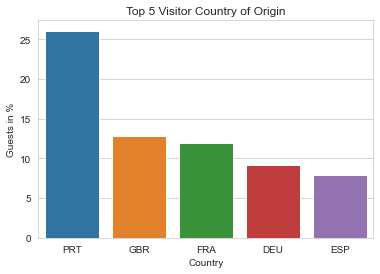

In [12]:
# getting the number of actual guests by country
country = pd.DataFrame(arrivals_2016[arrivals_2016['is_canceled'] ==0]['country'].value_counts())

# country_data.index.name = 'country'
country.rename(columns={'country': 'Number of Guests'}, inplace=True)
total_guests = country['Number of Guests'].sum()
country['Guests in %'] = round(country['Number of Guests']/ total_guests *100, 2)
country['country'] = country.index

# top 5 barplot
sns.set_style('whitegrid')
sns.barplot(data=country[:5], x='country', y='Guests in %')
plt.title('Top 5 Visitor Country of Origin')
plt.xlabel('Country')
plt.show()

It seems like most guests come from other countries in Europe.

#### 2. What is the ADR?

In [69]:
resort_adr = resort.groupby(['reserved_room_type']).adr.mean()

city_adr = city.groupby(['reserved_room_type']).adr.mean()

print('-------------------------------------------------------------')
print("The ADR of unit types throughout the year at the Resort Hotel:")
print('')
print(round(resort_adr,2))
print('-------------------------------------------------------------')

print('')

print("The ADR of unit types throughout the year at the City Hotel:")
print('')
print(round(city_adr, 2))

-------------------------------------------------------------
The ADR of unit types throughout the year at the Resort Hotel:

reserved_room_type
A     70.85
C    147.00
D     94.79
E    101.14
F    127.95
G    157.68
H    174.28
Name: adr, dtype: float64
-------------------------------------------------------------

The ADR of unit types throughout the year at the City Hotel:

reserved_room_type
A     70.85
C    147.00
D     94.79
E    101.14
F    127.95
G    157.68
H    174.28
Name: adr, dtype: float64


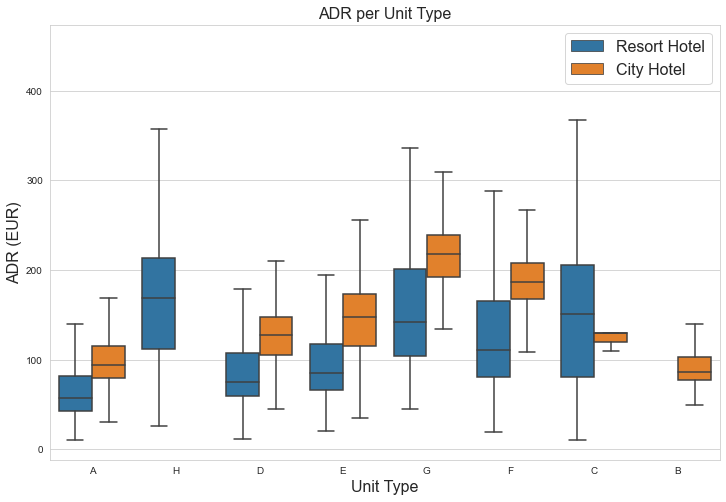

In [14]:
arrival = arrivals_2016[arrivals_2016['is_canceled'] ==0]

# boxplot:
plt.figure(figsize=(12, 8))
sns.boxplot(data=arrival, 
            x='reserved_room_type', 
            y='adr', 
            hue='hotel', 
            fliersize=0)

plt.title("ADR per Unit Type", fontsize=16)
plt.xlabel("Unit Type", fontsize=16)
plt.ylabel("ADR (EUR)", fontsize=16)
plt.legend(loc="upper right", fontsize=16)
plt.show()

It should be noted here that the configurations of each Unit Type may not be the same between Resort Hotel and City Hotel.

#### 3. Are certain timeframes busier than others? Seasonality

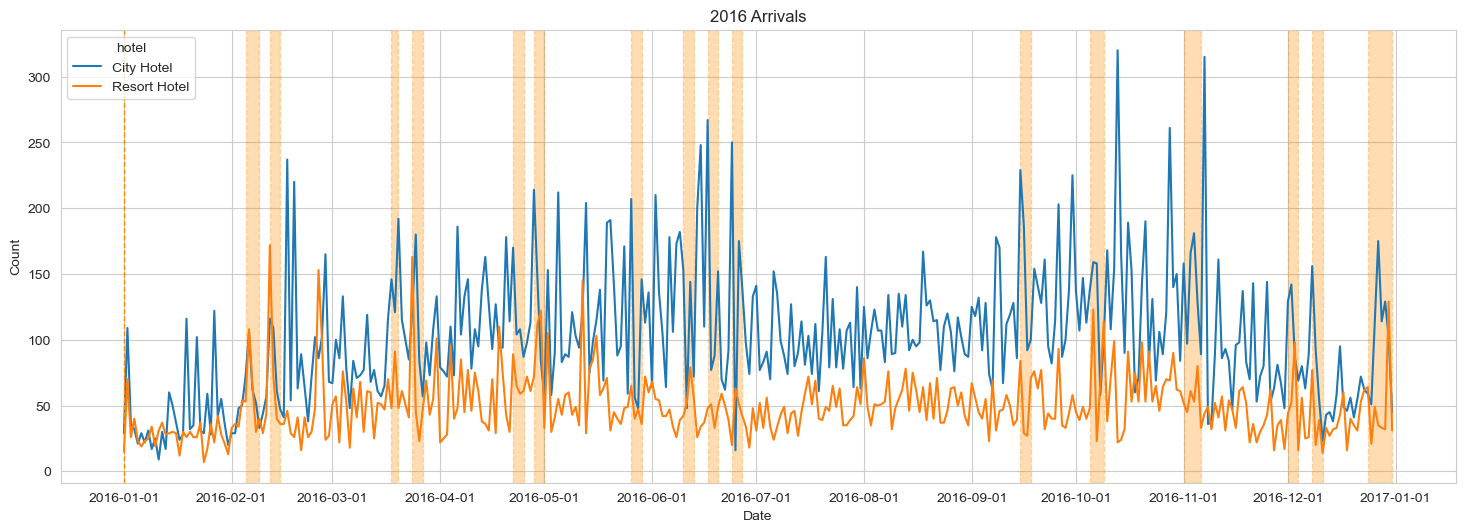

In [15]:
from datetime import timedelta
from datetime import datetime
from matplotlib.dates import date2num

arrivals = arrivals_2016.groupby(['date', 'hotel']).date.count()

arrivals = pd.DataFrame(arrivals)
arrivals.rename(columns={'date': 'count'}, inplace=True)

fig=plt.figure(figsize=(18,6), dpi=100)

sns.lineplot(data=arrivals, x='date', y='count', hue='hotel')

ticks = ['2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
         '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01', 
         '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01', '2017-01-01']

plt.xticks(ticks)
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('2016 Arrivals')

plt.axvline(date2num(datetime(2016,1,1)), color ='darkorange', linestyle='dashed', linewidth='1', label='New Years Day')
plt.axvspan(date2num(datetime(2016,2,5)), date2num(datetime(2016,2,9)), color ='darkorange', linestyle='dashed', linewidth='1', label='Carnival / Shrove Tuesday', alpha=0.3)
plt.axvspan(date2num(datetime(2016,2,12)),date2num(datetime(2016,2,15)), color ='darkorange', linestyle='dashed', linewidth='1', label='Valentines Day', alpha=0.3)
plt.axvspan(date2num(datetime(2016,3,18)), date2num(datetime(2016,3,20)), color ='darkorange', linestyle='dashed', linewidth='1', label='Fathers Day', alpha=0.3)
plt.axvspan(date2num(datetime(2016,3,24)), date2num(datetime(2016,3,27)), color ='darkorange', linestyle='dashed', linewidth='1', label='Good Friday/Easter', alpha=0.3)
plt.axvspan(date2num(datetime(2016,4,22)), date2num(datetime(2016,4,25)), color ='darkorange', linestyle='dashed', linewidth='1', label='Liberty Day', alpha=0.3)
plt.axvspan(date2num(datetime(2016,4,28)), date2num(datetime(2016,5,1)), color ='darkorange', linestyle='dashed', linewidth='1', label='Labor Day', alpha=0.3)
plt.axvspan(date2num(datetime(2016,5,26)), date2num(datetime(2016,5,29)), color ='darkorange', linestyle='dashed', linewidth='1', label='Corpus Christi', alpha=0.3)
plt.axvspan(date2num(datetime(2016,6,10)), date2num(datetime(2016,6,13)), color ='darkorange', linestyle='dashed', linewidth='1', label='Portugal Day/ St.Anthonys Day', alpha=0.3)
plt.axvspan(date2num(datetime(2016,6,17)), date2num(datetime(2016,6,20)), color ='darkorange', linestyle='dashed', linewidth='1', label='June Solstice', alpha=0.3)
plt.axvspan(date2num(datetime(2016,6,24)), date2num(datetime(2016,6,27)), color ='darkorange', linestyle='dashed', linewidth='1', label='St. Johns Day', alpha=0.3)
plt.axvspan(date2num(datetime(2016,9,15)), date2num(datetime(2016,9,18)), color ='darkorange', linestyle='dashed', linewidth='1', label='Birth of Bocage', alpha=0.3)
plt.axvspan(date2num(datetime(2016,10,5)), date2num(datetime(2016,10,9)), color ='darkorange', linestyle='dashed', linewidth='1', label='Republic Implantaion', alpha=0.3)
plt.axvspan(date2num(datetime(2016,11,1)), date2num(datetime(2016,11,6)), color ='darkorange', linestyle='dashed', linewidth='1', label='All Saints Day', alpha=0.3)
plt.axvspan(date2num(datetime(2016,12,1)), date2num(datetime(2016,12,4)), color ='darkorange', linestyle='dashed', linewidth='1', label='Restoration of Independence', alpha=0.3)
plt.axvspan(date2num(datetime(2016,12,8)), date2num(datetime(2016,12,11)), color ='darkorange', linestyle='dashed', linewidth='1', label='Feast of the Immaculate Conception', alpha=0.3)
plt.axvspan(date2num(datetime(2016,12,24)), date2num(datetime(2016,12,31)), color ='darkorange', linestyle='dashed', linewidth='1', label='Christmas/New Years', alpha=0.3)
      
plt.show()

Holidays are highlighted. The busiest time frame is between 9/15 and the first week of November. March until Juy seems to also be very popular. There seems to be a low season between 1/1 and 2/1, and 7/1 and 9/1. July to September is steady and seems more predictable than other points in the year.

#### 4. How does the ADR vary in relation to seasonality?

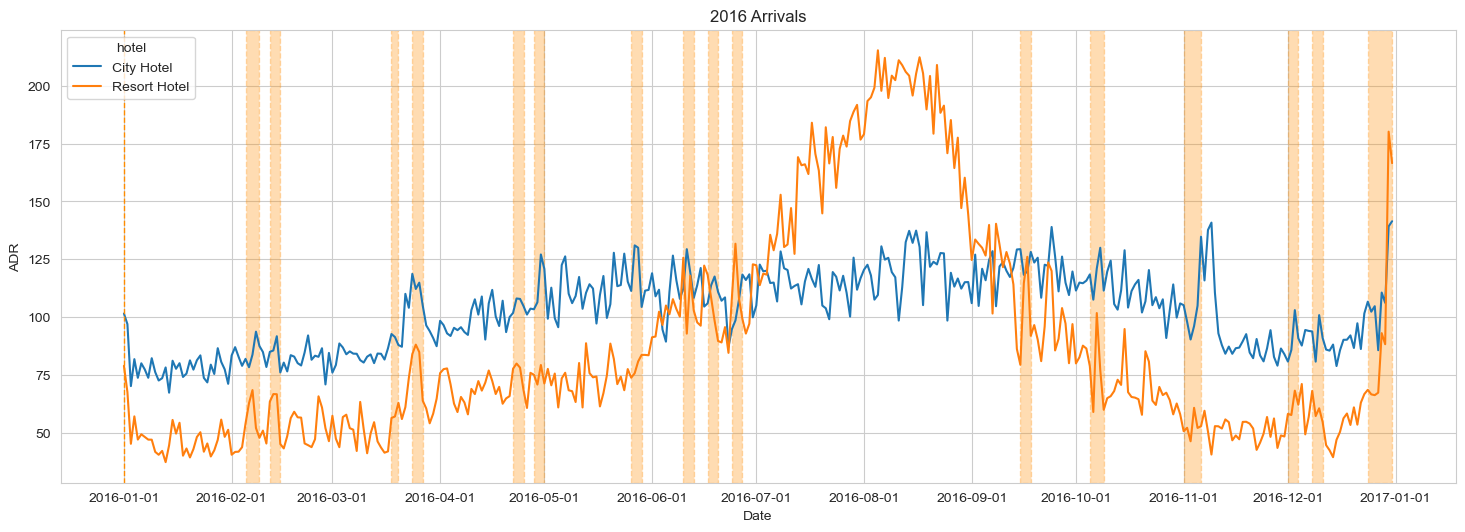

In [16]:
ticks = ['2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
         '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01', 
         '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01', '2017-01-01']

# creating arrivals lineplot
fig=plt.figure(figsize=(18,6), dpi=100)

adr_avg = arrivals_2016.groupby(['date', 'hotel']).adr.mean()
adr_avg = pd.DataFrame(adr_avg)
adr_avg

sns.lineplot(data=adr_avg, x='date', y='adr', hue='hotel')

plt.xticks(ticks)
plt.xlabel('Date')
plt.ylabel('ADR')
plt.title('2016 Arrivals')

plt.axvline(date2num(datetime(2016,1,1)), color ='darkorange', linestyle='dashed', linewidth='1', label='New Years Day')
plt.axvspan(date2num(datetime(2016,2,5)), date2num(datetime(2016,2,9)), color ='darkorange', linestyle='dashed', linewidth='1', label='Carnival / Shrove Tuesday', alpha=0.3)
plt.axvspan(date2num(datetime(2016,2,12)),date2num(datetime(2016,2,15)), color ='darkorange', linestyle='dashed', linewidth='1', label='Valentines Day', alpha=0.3)
plt.axvspan(date2num(datetime(2016,3,18)), date2num(datetime(2016,3,20)), color ='darkorange', linestyle='dashed', linewidth='1', label='Fathers Day', alpha=0.3)
plt.axvspan(date2num(datetime(2016,3,24)), date2num(datetime(2016,3,27)), color ='darkorange', linestyle='dashed', linewidth='1', label='Good Friday/Easter', alpha=0.3)
plt.axvspan(date2num(datetime(2016,4,22)), date2num(datetime(2016,4,25)), color ='darkorange', linestyle='dashed', linewidth='1', label='Liberty Day', alpha=0.3)
plt.axvspan(date2num(datetime(2016,4,28)), date2num(datetime(2016,5,1)), color ='darkorange', linestyle='dashed', linewidth='1', label='Labor Day', alpha=0.3)
plt.axvspan(date2num(datetime(2016,5,26)), date2num(datetime(2016,5,29)), color ='darkorange', linestyle='dashed', linewidth='1', label='Corpus Christi', alpha=0.3)
plt.axvspan(date2num(datetime(2016,6,10)), date2num(datetime(2016,6,13)), color ='darkorange', linestyle='dashed', linewidth='1', label='Portugal Day/ St.Anthonys Day', alpha=0.3)
plt.axvspan(date2num(datetime(2016,6,17)), date2num(datetime(2016,6,20)), color ='darkorange', linestyle='dashed', linewidth='1', label='June Solstice', alpha=0.3)
plt.axvspan(date2num(datetime(2016,6,24)), date2num(datetime(2016,6,27)), color ='darkorange', linestyle='dashed', linewidth='1', label='St. Johns Day', alpha=0.3)
plt.axvspan(date2num(datetime(2016,9,15)), date2num(datetime(2016,9,18)), color ='darkorange', linestyle='dashed', linewidth='1', label='Birth of Bocage', alpha=0.3)
plt.axvspan(date2num(datetime(2016,10,5)), date2num(datetime(2016,10,9)), color ='darkorange', linestyle='dashed', linewidth='1', label='Republic Implantaion', alpha=0.3)
plt.axvspan(date2num(datetime(2016,11,1)), date2num(datetime(2016,11,6)), color ='darkorange', linestyle='dashed', linewidth='1', label='All Saints Day', alpha=0.3)
plt.axvspan(date2num(datetime(2016,12,1)), date2num(datetime(2016,12,4)), color ='darkorange', linestyle='dashed', linewidth='1', label='Restoration of Independence', alpha=0.3)
plt.axvspan(date2num(datetime(2016,12,8)), date2num(datetime(2016,12,11)), color ='darkorange', linestyle='dashed', linewidth='1', label='Feast of the Immaculate Conception', alpha=0.3)
plt.axvspan(date2num(datetime(2016,12,24)), date2num(datetime(2016,12,31)), color ='darkorange', linestyle='dashed', linewidth='1', label='Christmas/New Years', alpha=0.3)
      
plt.show()

#### 4. What is the length of stay frequency?

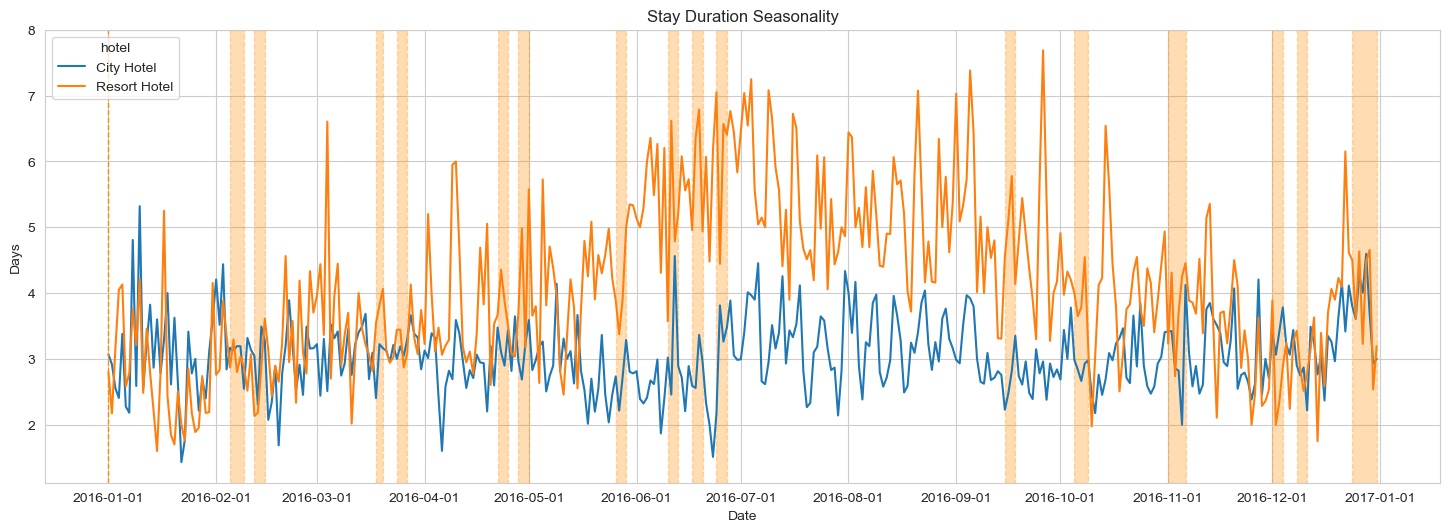

In [17]:
# daily average length of stay per hotel type
avg_los = arrivals_2016.groupby(['date', 'hotel']).los.mean()
avg_los = pd.DataFrame(avg_los)

fig=plt.figure(figsize=(18,6), dpi=100)

sns.lineplot(data=avg_los, x='date', y='los', hue='hotel')

plt.xticks(ticks)
plt.xlabel('Date')
plt.ylabel('Days')
plt.title('Stay Duration Seasonality')

plt.axvline(date2num(datetime(2016,1,1)), color ='darkorange', linestyle='dashed', linewidth='1', label='New Years Day')
plt.axvspan(date2num(datetime(2016,2,5)), date2num(datetime(2016,2,9)), color ='darkorange', linestyle='dashed', linewidth='1', label='Carnival / Shrove Tuesday', alpha=0.3)
plt.axvspan(date2num(datetime(2016,2,12)),date2num(datetime(2016,2,15)), color ='darkorange', linestyle='dashed', linewidth='1', label='Valentines Day', alpha=0.3)
plt.axvspan(date2num(datetime(2016,3,18)), date2num(datetime(2016,3,20)), color ='darkorange', linestyle='dashed', linewidth='1', label='Fathers Day', alpha=0.3)
plt.axvspan(date2num(datetime(2016,3,24)), date2num(datetime(2016,3,27)), color ='darkorange', linestyle='dashed', linewidth='1', label='Good Friday/Easter', alpha=0.3)
plt.axvspan(date2num(datetime(2016,4,22)), date2num(datetime(2016,4,25)), color ='darkorange', linestyle='dashed', linewidth='1', label='Liberty Day', alpha=0.3)
plt.axvspan(date2num(datetime(2016,4,28)), date2num(datetime(2016,5,1)), color ='darkorange', linestyle='dashed', linewidth='1', label='Labor Day', alpha=0.3)
plt.axvspan(date2num(datetime(2016,5,26)), date2num(datetime(2016,5,29)), color ='darkorange', linestyle='dashed', linewidth='1', label='Corpus Christi', alpha=0.3)
plt.axvspan(date2num(datetime(2016,6,10)), date2num(datetime(2016,6,13)), color ='darkorange', linestyle='dashed', linewidth='1', label='Portugal Day/ St.Anthonys Day', alpha=0.3)
plt.axvspan(date2num(datetime(2016,6,17)), date2num(datetime(2016,6,20)), color ='darkorange', linestyle='dashed', linewidth='1', label='June Solstice', alpha=0.3)
plt.axvspan(date2num(datetime(2016,6,24)), date2num(datetime(2016,6,27)), color ='darkorange', linestyle='dashed', linewidth='1', label='St. Johns Day', alpha=0.3)
plt.axvspan(date2num(datetime(2016,9,15)), date2num(datetime(2016,9,18)), color ='darkorange', linestyle='dashed', linewidth='1', label='Birth of Bocage', alpha=0.3)
plt.axvspan(date2num(datetime(2016,10,5)), date2num(datetime(2016,10,9)), color ='darkorange', linestyle='dashed', linewidth='1', label='Republic Implantaion', alpha=0.3)
plt.axvspan(date2num(datetime(2016,11,1)), date2num(datetime(2016,11,6)), color ='darkorange', linestyle='dashed', linewidth='1', label='All Saints Day', alpha=0.3)
plt.axvspan(date2num(datetime(2016,12,1)), date2num(datetime(2016,12,4)), color ='darkorange', linestyle='dashed', linewidth='1', label='Restoration of Independence', alpha=0.3)
plt.axvspan(date2num(datetime(2016,12,8)), date2num(datetime(2016,12,11)), color ='darkorange', linestyle='dashed', linewidth='1', label='Feast of the Immaculate Conception', alpha=0.3)
plt.axvspan(date2num(datetime(2016,12,24)), date2num(datetime(2016,12,31)), color ='darkorange', linestyle='dashed', linewidth='1', label='Christmas/New Years', alpha=0.3)

plt.show()

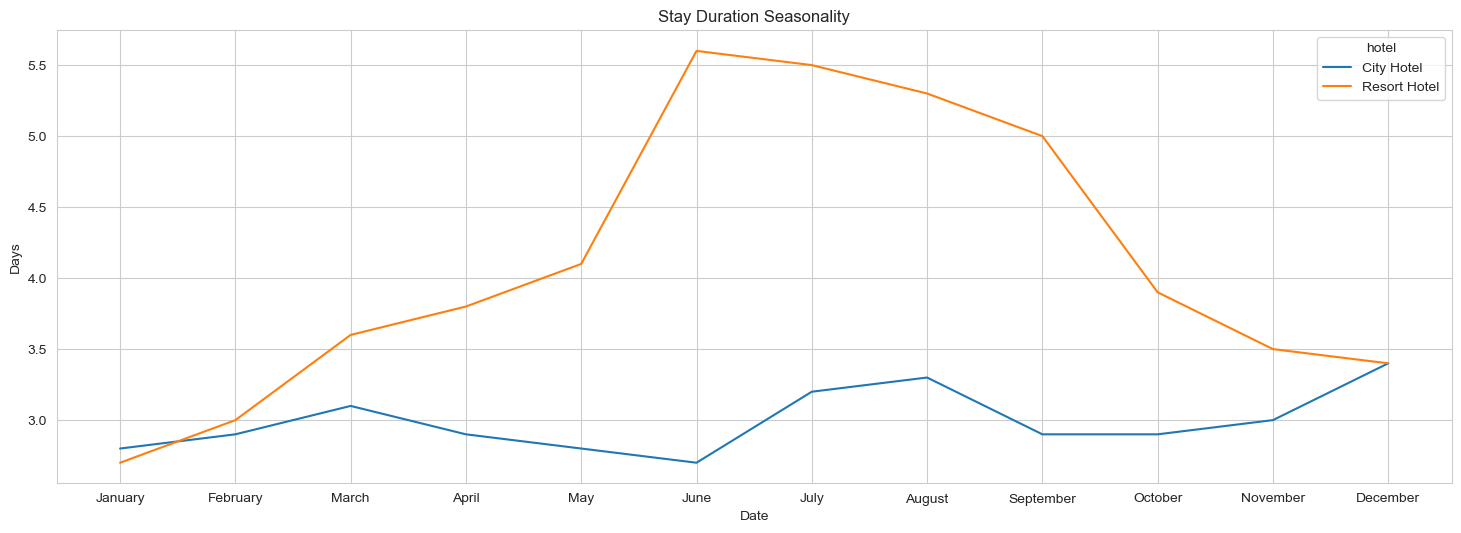

In [18]:
# monthly average length of stay per hotel type
avg_los_monthly = round(arrivals_2016.groupby(['arrival_date_month', 'hotel']).los.mean(),1)
avg_los_monthly = pd.DataFrame(avg_los_monthly).reset_index()

months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
avg_los_monthly['arrival_date_month'] = pd.Categorical(avg_los_monthly['arrival_date_month'], categories=months, ordered=True)
avg_los_monthly = avg_los_monthly.sort_values(by='arrival_date_month')
avg_los_monthly.reset_index(drop=True)

fig=plt.figure(figsize=(18,6), dpi=100)

sns.lineplot(data=avg_los_monthly, x='arrival_date_month', y='los', hue='hotel')

plt.xlabel('Date')
plt.ylabel('Days')
plt.title('Stay Duration Seasonality')

plt.show()

In [19]:
arrivals_2016.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card', 'date', 'book_date', 'los'],
      dtype='object')

#### 6. What is the booking curve and does it change throughout the year?

In [20]:
lead_avg = arrivals_2016.groupby(['date', 'book_date', 'hotel']).lead_time.mean()
lead_avg = pd.DataFrame(lead_avg)
lead_avg



lead_time
date       book_date  hotel                  
2016-01-01 2015-09-04 City Hotel          119
           2015-09-14 Resort Hotel        109
           2015-09-22 City Hotel          101
           2015-09-28 City Hotel           95
           2015-10-02 City Hotel           91
...                                       ...
2016-12-31 2016-12-26 Resort Hotel          5
           2016-12-27 Resort Hotel          4
           2016-12-29 City Hotel            2
           2016-12-30 City Hotel            1
           2016-12-31 Resort Hotel          0

[25337 rows x 1 columns]

In [21]:
arrivals_2016.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card', 'date', 'book_date', 'los'],
      dtype='object')

In [22]:
lead_times = lead_avg.groupby(['lead_time', 'hotel']).lead_time.count()
lead_times = pd.DataFrame({"Count": lead_times})
lead_times = lead_times.reset_index()
lead_times_resort = lead_times[lead_times['hotel']=='Resort Hotel']
lead_times_city = lead_times[lead_times['hotel']=='City Hotel']

In [27]:
# finding percentile values of the lead time to determine how people make purchasing decsisions
resort_75 = np.percentile(lead_times_resort.Count, 75)
resort_50 = np.percentile(lead_times_resort.Count, 50)
resort_25 = np.percentile(lead_times_resort.Count, 25)
# printing out values for the resort percentiles
print(f"The 25th percentile is equal to {resort_25} days prior to arrival.")
print(f"The 50th percentile (median) is equal to {resort_50} days prior to arrival.")
print(f"The 75th percentile is equal to {resort_75} days prior to arrival.")

The 25th percentile is equal to 4.0 days prior to arrival.
The 50th percentile (median) is equal to 16.0 days prior to arrival.
The 75th percentile is equal to 27.0 days prior to arrival.


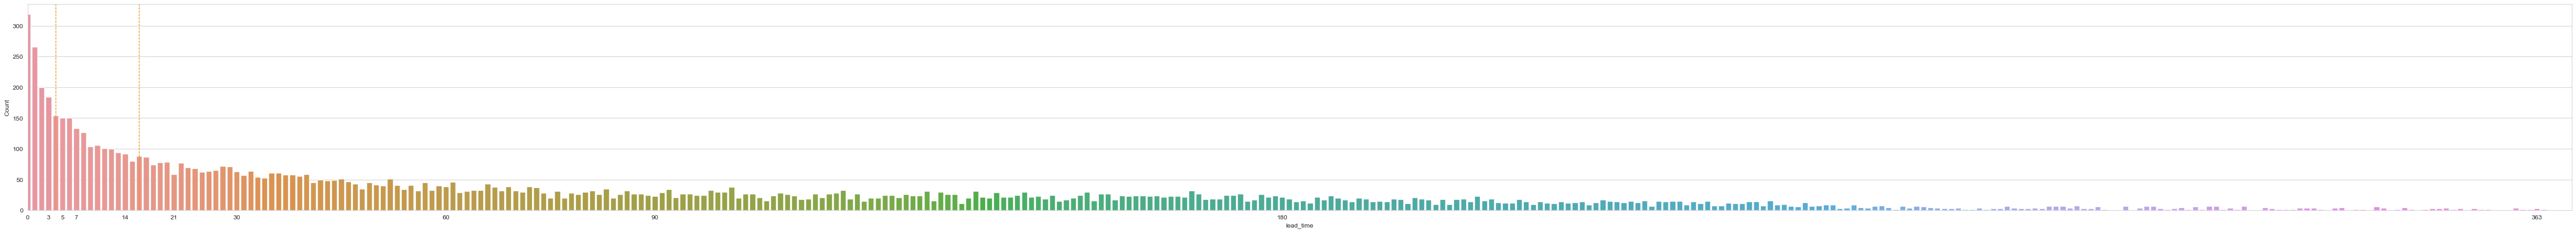

In [23]:
fig=plt.figure(figsize=(72,6), dpi=100)
ticks = [0, 3, 5, 7, 14, 21, 30, 60, 90, 180, 360]
sns.barplot(data=lead_times_resort, x='lead_time', y='Count')
plt.axvline(resort_50, color ='darkorange', linestyle='dashed', linewidth='1')
plt.xticks(ticks)
plt.xlim(0,365)
plt.show()


In [28]:
# finding percentile values of the lead time to determine how people make purchasing decsisions
city_75 = np.percentile(lead_times_resort.Count, 75)
city_50 = np.percentile(lead_times_city.Count, 50)
city_25 = np.percentile(lead_times_city.Count, 25)
# printing out values for the city percentiles
print(f"The 25th percentile is equal to {city_25} days prior to arrival.")
print(f"The 50th percentile (median) is equal to {city_50} days prior to arrival.")
print(f"The 75th percentile is equal to {city_75} days prior to arrival.")

The 25th percentile is equal to 4.0 days prior to arrival.
The 50th percentile (median) is equal to 21.5 days prior to arrival.
The 75th percentile is equal to 27.0 days prior to arrival.


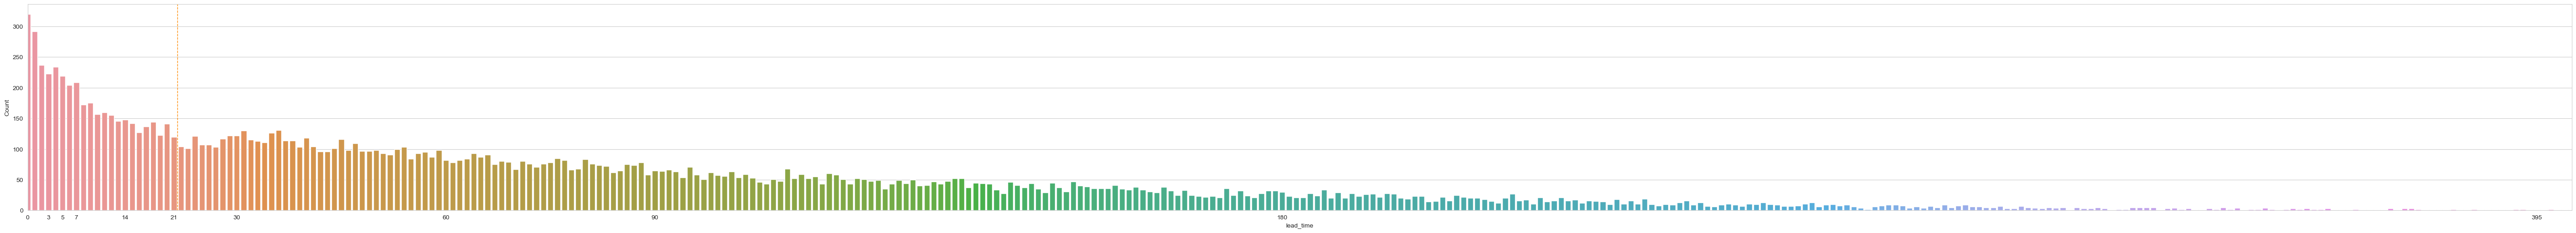

In [68]:
fig=plt.figure(figsize=(72,6), dpi=100)
ticks = [0, 3, 5, 7, 14, 21, 30, 60, 90, 180, 360]
sns.barplot(data=lead_times_city, x='lead_time', y='Count')
plt.axvline(city_50, color ='darkorange', linestyle='dashed', linewidth='1')
plt.xticks(ticks)
plt.xlim(0,365)
plt.show()

Find what percentage of bookings happen on or before a time frame.

In [65]:
resort_percentile = np.percentile(lead_times_resort.Count, 96.33)
print(f'For the Resort Hotel,\n96.33% of all bookings are made on, or within, {round(resort_percentile,1)} days to arrival')

city_percentile = np.percentile(lead_times_city.Count, 84.925)
print(f'For the City Hotel:\n84.92% of all bookings are made on, or within, {round(city_percentile,1)} days to arrival')

For the Resort Hotel,
96.33% of all bookings are made on, or within, 90.0 days to arrival
For the City Hotel:
84.92% of all bookings are made on, or within, 90.0 days to arrival


#### 6. What is the probability of cancellation?

In [91]:
# finding absolute cancellations
total_cancellations = arrivals_2016['is_canceled'].sum()
resort_cancellations = arrivals_2016.loc[arrivals_2016['hotel']=='Resort Hotel']['is_canceled'].sum()
city_cancellations = arrivals_2016.loc[arrivals_2016['hotel']=='City Hotel']['is_canceled'].sum()

# as percentage
total_cancel = total_cancellations / len(arrivals_2016) *100
resort_total_cancel = resort_cancellations / len(arrivals_2016.loc[arrivals_2016["hotel"] == "Resort Hotel"])*100
city_total_cancel = city_cancellations / len(arrivals_2016.loc[arrivals_2016["hotel"] == "City Hotel"])*100

print(f'Total bookings cancelled in 2016: {total_cancellations:,} ({total_cancel:.0f}%)')
print(f'Resort Hotel bookings cancelled in 2016: {resort_cancellations:,} ({resort_total_cancel:.0f}%)')
print(f'City Hotel bookings cancelled in 2016: {city_cancellations:,} ({city_total_cancel:.0f}%)')

Total bookings cancelled in 2016: 20,206 (36%)
Resort Hotel bookings cancelled in 2016: 4,874 (27%)
City Hotel bookings cancelled in 2016: 15,332 (41%)


Having the date of cancellation would allow us to find the cancellation curve. Depending on the company's policies, it would be reasonable to assume that having a specific 'cancel by 'Y' days prior for full refund' policy would influence the shape of the cancellation curve. Knowing the shape of the cancellation curve would allow us to find 'X'% of reservations that do cancel, cancel at least 'Y' days prior. Adjusting the cancellation policy would influence the shape of the cancellation curve and may reduce the cancellation percentage. Alternatively, adjusting the cancellation policy may have an affect on the frequency of bookings. 